# 基于MindSpore的鸢尾花分类任务对比实验

本实验主要介绍如何使用MindSpore进行优化实验。共包含两个实验分别为：

- 实验一：利用不同优化器求解函数极值点实验
- 实验二：鸢尾花数据在不同优化器下的分类实验

通过分析无优化器、SGD优化器、Momentum优化器、Adam优化器模型在求极值点和分类任务下的结果 ，得到不同优化器的作用。

## 1、实验目的

- 掌握MindSpore中优化器的使用及其作用。
- 了解如何使用MindSpore进行SGD、Momentum、Adam优化器实验。
- 了解不同优化器原理。

## 2、SGD、Momentum、自适应（AdaGrad、RMSProp、Adam）优化器原理介绍

### 2.1 SGD优化器

梯度下降法：梯度下降（gradient descent）在机器学习中应用十分的广泛，是求解无约束优化问题最简单和最古老的方法之一。通过迭代，参数向梯度的反方向更新，直到收敛。

$$
W_{new} = W - \eta\frac{\partial J(W)}{\partial W}
$$

其中$ \frac{\partial  J(W)}{\partial W}  $ 表示损失函数 J 关于参数W的梯度；$ \eta $表示学习率；

**缺点：**

- 有可能会陷入局部最小值；
- 不会收敛，最终会一直在最小值附近波动，并不会达到最小值并停留在此；
- 下降速度慢；
- 选择合适的学习率比较困难；
- 在所有方向上统一的缩放梯度，不适用于稀疏数据；

### 2.2 Momentum优化器

Momentum：是动量优化法中的一种（Momentum、NAG），即使用动量(Momentum)的随机梯度下降法(SGD)，主要思想是引入一个积攒历史梯度信息的动量来加速SGD。其参数优化公式如下所示：

$$
v_{new} = \gamma v - \eta\frac{\partial J(W)}{\partial W} \\
W_{new} = W + v_{new}
$$

其中$ \frac{\partial  J(W)}{\partial W}  $ 表示损失函数 J 关于参数W的梯度；$ \eta $表示学习率；$ \gamma $表示动量的大小，一般取值为0.9。

这个算法和之前的梯度下降法(SGD)相比，唯一不同的就是多了一个$ \gamma v$。这一改动使Momentum会观察历史梯度，若当前梯度的方向与历史梯度一致（表明当前样本不太可能为异常点），则会增强这个方向的梯度；若当前梯度与历史梯方向不一致，则梯度会衰减。一种形象的解释是：我们把一个球推下山，球在下坡时积聚动量，在途中变得越来越快，γ可视为空气阻力，若球的方向发生变化，则动量会衰减。

**优点：**

- 参考了历史梯度，增加了稳定性；
- 由于引入加速动量，加快收敛速度。下降初期时，使用上一次参数更新，下降方向一致，乘上较大的$ \gamma $能够进行很好的加速；
- 还有一定摆脱局部最优的能力。下降中后期时，在局部最小值来回震荡的时候，梯度趋近于0，$ \gamma $使得更新幅度增大，跳出陷阱（局部最优）；

### 2.3 自适应优化器

自适应学习率优化算法主要有：AdaGrad算法，RMSProp算法，Adam算法以及AdaDelta算法。

**AdaGrad**

AdaGrad的基本思想是对每个变量用不同的学习率。这个学习率在一开始比较大，用于快速梯度下降。随着优化过程的进行，对于已经下降很多的变量，则减缓学习率，对于还没怎么下降的变量，则保持一个较大的学习率。其参数优化公式如下所示：

$$
G_{new} = G + (\frac{\partial J(W)}{\partial W})^2 \\
W_{new} = W - \frac{\eta}{(\sqrt{G_{new}} + \varepsilon)}\cdot\frac{\partial J(W)}{\partial W}
$$

其中$ \frac{\partial J(W)}{\partial W}  $ 表示损失函数 J 关于参数W的梯度；$ \eta $表示学习率，一般取值0.01；$ \varepsilon $是一个很小的数，防止分母为0；$G_{new}$表示了前t 步参数$W$梯度的平方累加。把沿路的Gradient的平方根，作为Regularizer。分母作为Regularizer项的工作机制如下：

1. 训练前期，梯度较小，使得Regularizer项很大，放大梯度。[激励阶段]
2. 训练后期，梯度较大，使得Regularizer项很小，缩小梯度。[惩罚阶段]

**优点：**

- 在数据分布稀疏的场景，能更好利用稀疏梯度的信息，比标准的SGD算法更有效地收敛；
- 对每个变量用不同的学习率，对输入参数学习率的依赖小，容易调节参数；

**缺点：**

- 主要缺陷来自分母项的对梯度平方不断累积，随之时间步地增加，分母项越来越大，最终导致学习率收缩到太小无法进行有效更新；

**RMSProp**

为了解决 Adagrad 学习率急剧下降问题，RMSProp保留过去梯度的微分平方数项，旨在消除梯度下降中的摆动。与Momentum的效果一样，某一维度的导数比较大，则指数加权平均就大，某一维度的导数比较小，则其指数加权平均就小，这样就保证了各维度导数都在一个量级，进而减少了摆动。允许使用一个更大的学习率η。其参数优化公式如下所示：

$$
v_{new} = \gamma\cdot v + (1 - \gamma)\cdot{(\frac{\partial J(W)}{\partial W})}^2 \\
W_{new} = W - \frac{\eta}{(\sqrt{v_{new}} + \varepsilon)}(\frac{\partial J(W)}{\partial W})
$$

其中$ \frac{\partial  J (W)}{\partial W}  $ 表示损失函数 J 关于参数W的梯度；$ \eta $表示学习率，一般取值0.001；$ \varepsilon $是一个很小的数，防止分母为0；$ \gamma $表示动量的大小,一般取值为0.9。

**Adam**

Adam算法是另一种计算每个参数的自适应学习率的方法。相当于 RMSprop + Momentum。除了像RMSprop存储了过去梯度的平方 $ v_t $ 的指数衰减平均值 ，也像 momentum 一样保持了过去梯度$ m_t $ 的指数衰减平均值。其参数优化公式如下所示：

$$
m_{new} = \beta _1 m + (1 - \beta _1)(\frac{\partial J(W)}{\partial W})
$$

$$
v_{new} = \beta _2 v + (1 - \beta _2)(\frac{\partial J(W)}{\partial W})^2
$$

由于$\frac{m_0}{v_0}$初始化为0，会导致$\frac{m_{new}}{v_{new}}$偏向于0，尤其在训练初期阶段，所以，此处需要对梯度均值$\frac{m_{new}}{v_{new}}$进行偏差纠正，降低偏差对训练初期的影响。

$$
\hat{m_{new}} = m_{new} / (1 - \beta _1) 
$$

$$
\hat{v_{new}} = v_{new} / (1 - \beta _2)
$$

$$
W_{new} = W - \eta\frac{1}{\sqrt{\hat{v_{new}}} + \varepsilon}\hat{m_{new}}
$$

其中$ \frac{\partial  J (W)}{\partial W}  $ 表示损失函数 J 关于参数W的梯度；$ \eta $表示学习率，一般取值0.001；$ \varepsilon $是一个很小的数，一般取值10e−8，防止分母为0；$ \beta _1 $ $ \beta _2 $分别表示一阶和二阶动量的大小，一般取值为$ \beta _1 = 0.9 $ $ \beta _2 = 0.99 $。

**优点**

- 能够克服AdaGrad梯度急剧减小的问题，在很多应用中都展示出优秀的学习率自适应能力；
- 实现简单，计算高效，对内存需求少；
- 参数的更新不受梯度的伸缩变换影响；
- 超参数具有很好的解释性，且通常无需调整或仅需很少的微调；
- 更新的步长能够被限制在大致的范围内（初始学习率）；
- 能自然地实现步长退火过程（自动调整学习率）；
- 很适合应用于大规模的数据及参数的场景；
- 适用于不稳定目标函数；
- 适用于梯度稀疏或梯度存在很大噪声的问题；



## 3、实验环境

- MindSpore 2.0（MindSpore版本会定期更新，本指导也会定期刷新，与版本配套）；
- 本案例支持win_x86和Linux系统，CPU/GPU/Ascend均可运行。
- 如果在本地运行此实验，请参考《MindSpore环境搭建实验手册》在本地安装MindSpore。

## 实验一：利用不同优化器求解函数极值点实验

## 4、数据处理

### 4.1 数据准备--求函数极值点

为了评价优化器的特性，我们模拟了一个目标函数求极值过程。定义不同优化器求其极值，与目标结果比较。

目标函数Beale 公式:

$$
f(x_1,x_2)=(1.5−x_1+x_1x_2)^2+(2.25−x_1+x_1x_2^2)^2+(2.625−x_1+x_1x_2^3)^2
$$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Beale%27s_function.pdf/page1-1200px-Beale%27s_function.pdf.jpg" width=600 height=450>
[Image credit: Gaortizg]

方程极值点$ (x_1,  x_2) = (3,  0.5) $

我们需要通过各种不同的优化器来优化目标函数。优化器的主要目的是通过迭代找到目标函数的极小值或者极大值。常用的优化器有：SGD、Momentum、NAG、Adagrad、Adam等。

### 4.2 数据加载及可视化

定义目标函数beale、目标函数的偏导函数dbeale_dx，并画出目标函数和极值点

目标结果 (x_1, x_2) = (3, 0.5)


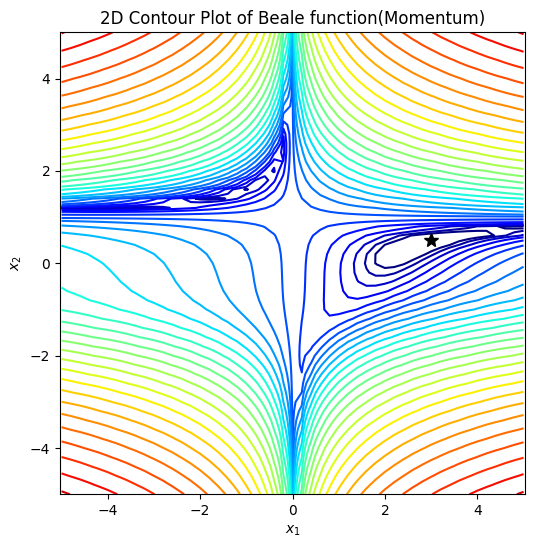

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as plt_cl  # Matplotlib的色阶条

# ------------------定义目标函数beale、目标函数的偏导函数dbeale_dx，并画出目标函数---------------------
#定义beale公式
def beale(x1,x2):
    return (1.5-x1+x1*x2)**2+(2.25-x1+x1*x2**2)**2+(2.625-x1+x1*x2**3)**2
#定义beale公式的偏导函数
def dbeale_dx(x1, x2):
    dfdx1 = 2*(1.5-x1+x1*x2)*(x2-1)+2*(2.25-x1+x1*x2**2)*(x2**2-1)+2*(2.625-x1+x1*x2**3)*(x2**3-1) # 求beale公式关于x1的偏导数
    dfdx2 = 2*(1.5-x1+x1*x2)*x1+2*(2.25-x1+x1*x2**2)*(2*x1*x2)+2*(2.625-x1+x1*x2**3)*(3*x1*x2**2)  # 求beale公式关于x2的偏导数
    return dfdx1, dfdx2


# 定义画图函数
def gd_plot(x_traj):
    plt.rcParams['figure.figsize'] = [6, 6]                   # 窗口大小
    plt.contour(X1, X2, Y, levels=np.logspace(0, 6, 30),
                norm=plt_cl.LogNorm(), cmap=plt.cm.jet)       # 画等高线图
    plt.title('2D Contour Plot of Beale function(Momentum)')  # 添加标题
    plt.xlabel('$x_1$')                                       # x轴标签
    plt.ylabel('$x_2$')                                       # y轴标签
    plt.axis('equal')                                         # 设置坐标轴为正方形
    plt.plot(3, 0.5, 'k*', markersize=10)                     # 画出最低点
    if x_traj is not None:
        x_traj = np.array(x_traj)                             # 将x_traj转为数组
        plt.plot(x_traj[:, 0], x_traj[:, 1], 'k-') 
# 以x_traj的第一列为x轴坐标，第二列为y轴坐标进行画图
plt.show()                                                    # 显示图像

step_x1, step_x2 = 0.2, 0.2
X1, X2 = np.meshgrid(np.arange(-5, 5 + step_x1, step_x1),
                     np.arange(-5, 5 + step_x2, step_x2))     # 将图形从-5 到 5.2，步长为0.2 划分成网格点
Y = beale(X1, X2)                                             # 将x1,x2坐标带入beale公式
print("目标结果 (x_1, x_2) = (3, 0.5)")
gd_plot(None)                                                 # 调用函数

## 5、无优化器、SGD、Momentum、Adam优化器求函数极值点实验

### 5.1 无优化器模型求函数极值点及可视化

下面是不使用优化器求解Beale 公式极值点实现。

无优化器求得极值点 (x_1, x_2) = (1.0, 1.5)


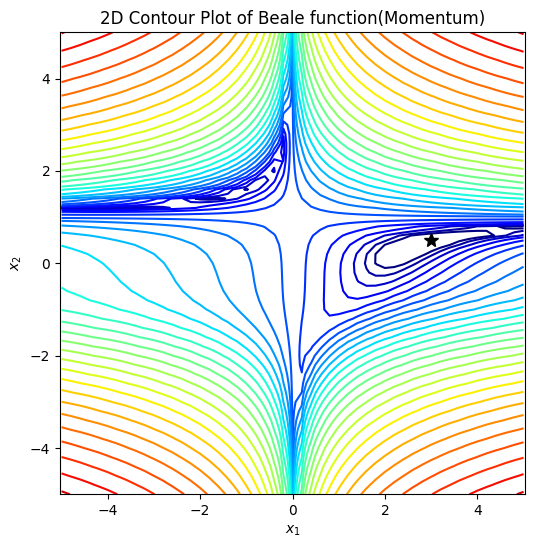

In [2]:
# ------------------------------------------------------------无优化器-------------------------------------------
#定义无优化器函数
def gd_no(df_dx, x0, conf_para=None):
    if conf_para is None:
        conf_para = {}
    conf_para.setdefault('n_iter', 1000)            # 迭代次数
    conf_para.setdefault('learning_rate', 0.001)    # 设置学习率
    x_traj = []
    x_traj.append(x0)
    v = np.zeros_like(x0)
#没有迭代更新的操作，所以，坐标没有变化
    for iter in range(1, conf_para['n_iter'] + 1):
        x_traj.append(x_traj[-1])
    return x_traj
#初始化坐标
x0 = np.array([1.0, 1.5])
conf_para_no = {'n_iter': 2000, 'learning_rate': 0.005}
#调用函数进行更新
x_traj_no = gd_no(dbeale_dx, x0, conf_para_no)
print("无优化器求得极值点 (x_1, x_2) = (%s, %s)" % (x_traj_no[-1][0], x_traj_no[-1][1]))
gd_plot(x_traj_no)

### 5.2 SGD优化器模型求函数极值点及可视化

下面是使用SGD优化器求解Beale 公式极值点实现。

SGD求得极值点 (x_1, x_2) = (2.981957257903412, 0.4954609564102124)


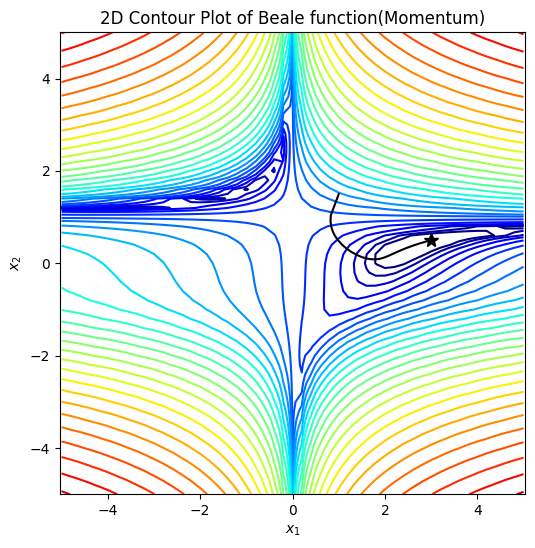

In [3]:
# ------------------------------------------------------------SGD-------------------------------------------
def gd_sgd(df_dx, x0, conf_para=None):
    if conf_para is None:
        conf_para = {}
    conf_para.setdefault('n_iter', 1000)             # 迭代次数
    conf_para.setdefault('learning_rate', 0.001)     # 设置学习率
    x_traj = []
    x_traj.append(x0)
    v = np.zeros_like(x0)
#利用梯度值对坐标进行更新
    for iter in range(1, conf_para['n_iter'] + 1):
        dfdx = np.array(df_dx(x_traj[-1][0], x_traj[-1][1]))  # 计算梯度
        v = - conf_para['learning_rate'] * dfdx               # 负的学习率*梯度值
        x_traj.append(x_traj[-1] + v)                         # 添加新的x_traj
    return x_traj

x0 = np.array([1.0, 1.5])
conf_para_sgd = {'n_iter': 2000, 'learning_rate': 0.005}
x_traj_sgd = gd_sgd(dbeale_dx, x0, conf_para_sgd)
print("SGD求得极值点 (x_1, x_2) = (%s, %s)" % (x_traj_sgd[-1][0], x_traj_sgd[-1][1]))
gd_plot(x_traj_sgd)

### 5.3 Momentum优化器模型求函数极值点及可视化

下面是使用Momentum优化器求解Beale 公式极值点实现。

Momentum求得极值点 (x_1, x_2) = (3.0004236971560485, 0.5001057348328146)


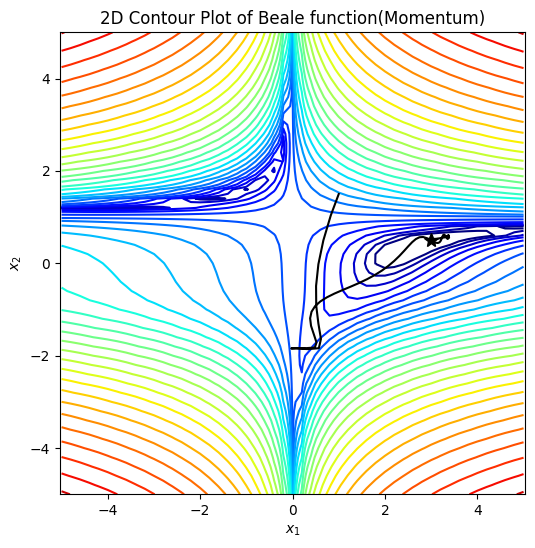

In [4]:
def gd_momentum(df_dx, x0, conf_para=None):
    if conf_para is None:
        conf_para = {}
    conf_para.setdefault('n_iter', 1000)          # 迭代次数
    conf_para.setdefault('learning_rate', 0.001)  # 设置学习率
    conf_para.setdefault('momentum', 0.9)         # 设置动量参数
    x_traj = []
    x_traj.append(x0)
    v = np.zeros_like(x0)
#套用动量优化器公式，对坐标值进行更新
    for iter in range(1, conf_para['n_iter'] + 1):
        dfdx = np.array(df_dx(x_traj[-1][0], x_traj[-1][1]))                # 计算梯度
        v = conf_para['momentum'] * v - conf_para['learning_rate'] * dfdx   # 计算更新
        x_traj.append(x_traj[-1] + v)
    return x_traj


x0 = np.array([1.0, 1.5])
conf_para_momentum = {'n_iter': 500, 'learning_rate': 0.005}
x_traj_momentum = gd_momentum(dbeale_dx, x0, conf_para_momentum)
print("Momentum求得极值点 (x_1, x_2) = (%s, %s)" % (x_traj_momentum[-1][0], x_traj_momentum[-1][1]))
gd_plot(x_traj_momentum)

### 5.4 自适应优化器模型求函数极值点及可视化

下面是使用自适应优化器求解Beale 公式极值点实现。

Adagrad求得极值点 (x_1, x_2) = (2.9993173156940776, 0.49982846432011524)


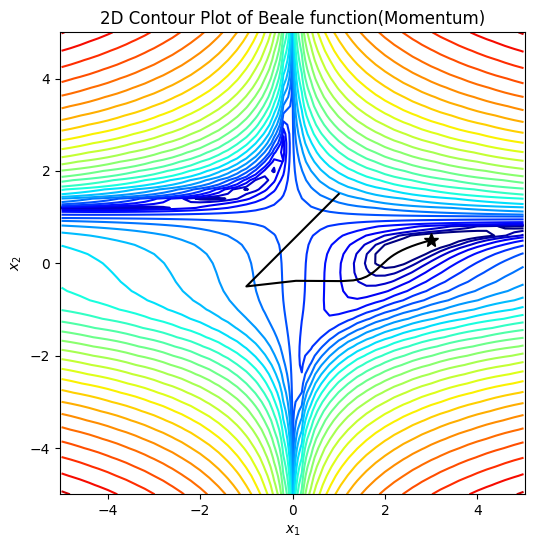

In [5]:
# ----------------------------------------------------adagrad-----------------------------
def gd_adagrad(df_dx, x0, conf_para=None):
    if conf_para is None:
        conf_para = {}
    conf_para.setdefault('n_iter', 1000)          # 迭代次数
    conf_para.setdefault('learning_rate', 0.001)  # 学习率
    conf_para.setdefault('epsilon', 1e-7)
    x_traj = []
    x_traj.append(x0)
    r = np.zeros_like(x0)
   #套用adagrad优化器公式，对参数进行更新
    for iter in range(1, conf_para['n_iter'] + 1):
        dfdx = np.array(df_dx(x_traj[-1][0], x_traj[-1][1]))
        r += dfdx ** 2
        x_traj.append(x_traj[-1] - conf_para['learning_rate'] / (np.sqrt(r) + conf_para['epsilon']) * dfdx)
    return x_traj


x0 = np.array([1.0, 1.5])
conf_para_adag = {'n_iter': 500, 'learning_rate': 2}
x_traj_adag = gd_adagrad(dbeale_dx, x0, conf_para_adag)
print("Adagrad求得极值点 (x_1, x_2) = (%s, %s)" % (x_traj_adag[-1][0], x_traj_adag[-1][1]))
gd_plot(x_traj_adag)

从结果可以看出：无优化器参数不更新，求函数极值点无效。SGD、Momentum、自适应优化器求得的极值点与目标点(3.0, 0.5)较近。SGD、Momentum、自适应优化器求解极值点方法有效。其中SGD优化器实验需要的迭代次数2000多，相比与后边Momentum优化器多迭代1500次，证明了SGD优化器收敛速度慢。从图像可以看出自适应优化器对收敛方向把握比较好。

## 实验二：鸢尾花数据在不同优化器下的分类实验

## 4、数据处理

### 4.1 数据准备
#### 下载数据
Iris数据集是模式识别最著名的数据集之一。数据集包含3类，每类50个实例，其中每个类都涉及一种鸢尾植物。 第一类与后两类可线性分离，后两类之间不能线性分离，所以本实验取前两类数据，做一个3分类数据集。  
  Iris数据集的官网：[Iris Data Set](http://archive.ics.uci.edu/ml/datasets/Iris)。  
方式一，从Iris数据集官网下载[iris.data文件](http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)。  
方式二，从华为云OBS中下载[iris.data文件](https://ascend-professional-construction-dataset.obs.cn-north-4.myhuaweicloud.com:443/deep-learning/iris.zip)。
​
每个样本含有4个数值属性和一个类别属性：
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: 
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica

概括统计：
```
                 Min  Max   Mean    SD   Class Correlation
   sepal length: 4.3  7.9   5.84  0.83    0.7826   
    sepal width: 2.0  4.4   3.05  0.43   -0.4194
   petal length: 1.0  6.9   3.76  1.76    0.9490  (high!)
    petal width: 0.1  2.5   1.20  0.76    0.9565  (high!)
```

In [6]:
from download import download

# 下载Iris数据集
url = "https://ascend-professional-construction-dataset.obs.cn-north-4.myhuaweicloud.com:443/deep-learning/iris.zip"
path = download(url, "./", kind="zip", replace=True)


file_sizes: 100%|███████████████████████████████| 926/926 [00:00<00:00, 312kB/s]
Extracting zip file...
Successfully downloaded / unzipped to ./


### 4.2 数据读取与处理

###### 导入MindSpore模块和辅助模块

In [7]:
import csv
import os
import time

import numpy as np
from easydict import EasyDict as edict
from matplotlib import pyplot as plt

import mindspore
from mindspore import nn, dataset, Tensor
from mindspore.train import Model, ModelCheckpoint, CheckpointConfig, TimeMonitor, LossMonitor

mindspore.set_context(mode=mindspore.GRAPH_MODE, device_target="CPU")  # 设定运行模式为静态图模式，并且运行设备为昇腾芯片

###### 变量定义

In [8]:
#变量定义
cfg = edict({
    'data_size': 150,
    'train_size': 120,                                    #训练集大小
    'test_size': 30 ,                                     #测试集大小
    'feature_number': 4,                                  #输入特征数
    'num_class': 3,                                       #分类类别
    'batch_size': 30,                                     #批次大小
    'data_dir':    'iris.data',                           # 数据集路径           
    'save_checkpoint_steps': 5,                           #多少步保存一次模型
    'keep_checkpoint_max': 1,                             #最多保存多少个模型
    'out_dir_no_opt':   './model_iris/no_opt',            #保存模型路径，无优化器模型
    'out_dir_sgd':   './model_iris/sgd',                  #保存模型路径,SGD优化器模型
    'out_dir_momentum':   './model_iris/momentum',        #保存模型路径，momentum模型
    'out_dir_adam':   './model_iris/adam',                #保存模型路径，adam优化器模型
    'output_prefix': "checkpoint_fashion_forward"         #保存模型文件名
})

###### 读取数据并预处理

读取Iris数据集iris.data。

In [9]:
#鸢尾花数据集，本数据集共有150个带标签的数据
with open(cfg.data_dir) as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))

共150条数据，将数据集的4个属性作为自变量X。将数据集的3个类别映射为{0, 1，2}，作为因变量Y。

In [10]:
label_map = {'setosa': 0,'versicolor': 1,'virginica':2 }
#分别获取数据中的特征值X和标签值Y
X = np.array([[float(x) for x in s[:-1]] for s in data[:cfg.data_size]], np.float32)
Y = np.array([label_map[s[-1]] for s in data[:cfg.data_size]], np.int32)

In [11]:
# 将数据集分为训练集120条，测试集30条。
train_idx = np.random.choice(cfg.data_size, cfg.train_size, replace=False)
test_idx = np.array(list(set(range(cfg.data_size)) - set(train_idx)))
X_train, Y_train = X[train_idx], Y[train_idx]
X_test, Y_test = X[test_idx], Y[test_idx]

使用MindSpore GeneratorDataset接口将numpy.ndarray类型的数据转换为 Dataset。

In [12]:
def gen_data(X_train, Y_train, epoch_size):
    #生成训练集
    XY_train = list(zip(X_train, Y_train))
    ds_train = dataset.GeneratorDataset(XY_train, ['x', 'y'])  # x, y 为列名
    #设定数据集大小
    #打乱操作并设定batchsize
    ds_train = ds_train.shuffle(buffer_size=cfg.train_size).batch(cfg.batch_size, drop_remainder=True) # buffer_size：数据集大小，drop_remainder：舍弃最后一个不完整的batch
    #生成测试集
    XY_test = list(zip(X_test, Y_test))
    ds_test = dataset.GeneratorDataset(XY_test, ['x', 'y'])
    #设定数据集大小
    #打乱操作并设定batchsize
    ds_test = ds_test.shuffle(buffer_size=cfg.test_size).batch(cfg.test_size, drop_remainder=True)
    return ds_train, ds_test

## 5、模型构建

本实验采用不同的优化器对全连接网络的权重参数进行优化，实现对鸢尾花的分类，以下训练函数先指定模型所需的损失函数、评估指标等参数。将创建好的网络、损失函数、评估指标等参数装入模型中对模型进行训练。

In [13]:
# 训练函数
def train(network, net_opt, ds_train, prefix, directory, print_times):
    #定义网络损失函数
    net_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction="mean")    # sparse为True时对Label数据做one_hot处理，reduction支持mean和sum
    #定义模型
    model = Model(network, loss_fn=net_loss, optimizer=net_opt, metrics={"acc"})  # 定义网络结构，损失函数，优化器，评估方式
    #定义损失值指标
    loss_cb = LossMonitor(per_print_times=print_times)                            # 每隔 print_times 步监测一下损失值
#     loss_cb = LossMonitor(per_print_times=int(cfg.train_size / cfg.batch_size)) # 每隔4步监测一下损失值

    #设置checkpoint
    config_ck = CheckpointConfig(save_checkpoint_steps=cfg.save_checkpoint_steps,       # 每5步保存一下模型
                                 keep_checkpoint_max=cfg.keep_checkpoint_max)           # 最多保存1个模型
    ckpoint_cb = ModelCheckpoint(prefix=prefix, directory=directory, config=config_ck)  # 设置文件名，文件路径，以及checkpoint参数
    print("============== Starting Training ==============")
    #训练模型
    model.train(epoch_size, ds_train, callbacks=[ckpoint_cb, loss_cb], dataset_sink_mode=False) # 设置训练次数，训练数据，回调函数（checkpoint和lossmonitor），Ascend是否采用下沉模式
    return model

## 6、模型训练

###### 无优化器训练

In [14]:
# --------------------------------------------------无优化器-----------------------------------
epoch_size = 20   # 训练20次
print('------------------无优化器--------------------------')
# 数据
ds_train, ds_test = gen_data(X_train, Y_train, epoch_size)  # 生成训练集和测试集
# 定义网络并训练
network = nn.Dense(cfg.feature_number, cfg.num_class)       # 定义一个全连接网络层，输入特征为4，输出类别为3
model1 = train(network, None, ds_train, "checkpoint_no_opt", cfg.out_dir_no_opt, print_times=4)  # 用训练集训练网络，设置网络结构，模型名称，保存路径, print_times

------------------无优化器--------------------------
============== Starting Training ==============
epoch: 1 step: 4, loss is 1.1206419467926025
epoch: 2 step: 4, loss is 1.0912569761276245
epoch: 3 step: 4, loss is 1.0935554504394531
epoch: 4 step: 4, loss is 1.0964614152908325
epoch: 5 step: 4, loss is 1.0957379341125488
epoch: 6 step: 4, loss is 1.095375657081604
epoch: 7 step: 4, loss is 1.1011462211608887
epoch: 8 step: 4, loss is 1.106386423110962
epoch: 9 step: 4, loss is 1.0966092348098755
epoch: 10 step: 4, loss is 1.1065597534179688
epoch: 11 step: 4, loss is 1.112493872642517
epoch: 12 step: 4, loss is 1.099502444267273
epoch: 13 step: 4, loss is 1.098559856414795
epoch: 14 step: 4, loss is 1.1084587574005127
epoch: 15 step: 4, loss is 1.0930836200714111
epoch: 16 step: 4, loss is 1.1154956817626953
epoch: 17 step: 4, loss is 1.1057838201522827
epoch: 18 step: 4, loss is 1.1050714254379272
epoch: 19 step: 4, loss is 1.1124104261398315
epoch: 20 step: 4, loss is 1.11127150058746

###### SGD优化器模型训练

In [15]:
# ---------------------------------------------------SGD-------------------------------------
epoch_size = 300  # 训练300次
lr = 0.01
print('-------------------SGD优化器-----------------------')
# 数据
ds_train, ds_test = gen_data(X_train, Y_train, epoch_size) # 生成训练集和测试集
# 定义网络并训练、测试、预测
network = nn.Dense(cfg.feature_number, cfg.num_class)      # 定义一个全连接网络层，输入特征为4，输出类别为3
net_opt = nn.SGD(network.trainable_params(), lr)           # 用SGD优化器进行优化 
model2 = train(network, net_opt, ds_train, "checkpoint_sgd", cfg.out_dir_sgd, 40)  # 用训练集训练网络，设置网络结构，优化器，模型名称，保存路径, print_times

-------------------SGD优化器-----------------------
============== Starting Training ==============
epoch: 10 step: 4, loss is 0.8553657531738281
epoch: 20 step: 4, loss is 0.7242041230201721
epoch: 30 step: 4, loss is 0.6518995761871338
epoch: 40 step: 4, loss is 0.6285415291786194
epoch: 50 step: 4, loss is 0.5270642042160034
epoch: 60 step: 4, loss is 0.5359905362129211
epoch: 70 step: 4, loss is 0.5017327070236206
epoch: 80 step: 4, loss is 0.4695192575454712
epoch: 90 step: 4, loss is 0.5098685026168823
epoch: 100 step: 4, loss is 0.4440963864326477
epoch: 110 step: 4, loss is 0.4862009286880493
epoch: 120 step: 4, loss is 0.4359998106956482
epoch: 130 step: 4, loss is 0.4259597063064575
epoch: 140 step: 4, loss is 0.33221200108528137
epoch: 150 step: 4, loss is 0.46737977862358093
epoch: 160 step: 4, loss is 0.4480915069580078
epoch: 170 step: 4, loss is 0.3354598879814148
epoch: 180 step: 4, loss is 0.43689030408859253
epoch: 190 step: 4, loss is 0.38046640157699585
epoch: 200 step

###### Momentum优化器模型训练

In [16]:
# ----------------------------------------------------Momentum-------------------------------
epoch_size = 20  # 训练20次
lr = 0.01        # 学习率为0.01
print('-------------------Momentum优化器-----------------------')
# 数据
ds_train, ds_test = gen_data(X_train, Y_train, epoch_size)  # 生成训练集和测试集
# 定义网络并训练
network = nn.Dense(cfg.feature_number, cfg.num_class)       # 定义一个全连接网络层，输入特征为4，输出类别为3
net_opt = nn.Momentum(network.trainable_params(), lr, 0.9)  # 用 momentum 优化器进行优化，学习率为0.01，动量大小为0.9
model3 = train(network, net_opt, ds_train, "checkpoint_momentum", cfg.out_dir_momentum, 4)  # 用训练集训练网络，设置网络结构，优化器，模型名称，保存路径, print_times

-------------------Momentum优化器-----------------------
============== Starting Training ==============
epoch: 1 step: 4, loss is 1.0684319734573364
epoch: 2 step: 4, loss is 0.9277157187461853
epoch: 3 step: 4, loss is 0.8320741653442383
epoch: 4 step: 4, loss is 0.7540056109428406
epoch: 5 step: 4, loss is 0.5780960321426392
epoch: 6 step: 4, loss is 0.562127411365509
epoch: 7 step: 4, loss is 0.5290772914886475
epoch: 8 step: 4, loss is 0.5166775584220886
epoch: 9 step: 4, loss is 0.49842482805252075
epoch: 10 step: 4, loss is 0.5271018743515015
epoch: 11 step: 4, loss is 0.4620029032230377
epoch: 12 step: 4, loss is 0.4773297607898712
epoch: 13 step: 4, loss is 0.44197654724121094
epoch: 14 step: 4, loss is 0.44995585083961487
epoch: 15 step: 4, loss is 0.41613972187042236
epoch: 16 step: 4, loss is 0.372479110956192
epoch: 17 step: 4, loss is 0.2833605408668518
epoch: 18 step: 4, loss is 0.4280036985874176
epoch: 19 step: 4, loss is 0.4687044322490692
epoch: 20 step: 4, loss is 0.33

###### Adam优化器模型训练

In [17]:
# ----------------------------------------------------Adam-----------------------------------
epoch_size = 15  # 训练15次
lr = 0.1         # 学习率为0.1, 动态学习率
print('------------------Adam优化器--------------------------')
# 数据
ds_train, ds_test = gen_data(X_train, Y_train, epoch_size)        # 生成训练集和测试集
# 定义网络并训练
network = nn.Dense(cfg.feature_number, cfg.num_class)             # 定义一个全连接网络层，输入特征为4，输出类别为3
net_opt = nn.Adam(network.trainable_params(), learning_rate=lr)   # 用 Adam 优化器进行优化，学习率为0.1
model4 = train(network, net_opt, ds_train, "checkpoint_adam", cfg.out_dir_adam, 4)  # 用训练集训练网络，设置网络结构，优化器，模型名称，保存路径, print_times

------------------Adam优化器--------------------------
============== Starting Training ==============
epoch: 1 step: 4, loss is 0.9625171422958374
epoch: 2 step: 4, loss is 0.8237267732620239
epoch: 3 step: 4, loss is 0.646861732006073
epoch: 4 step: 4, loss is 0.4901014566421509
epoch: 5 step: 4, loss is 0.33290454745292664
epoch: 6 step: 4, loss is 0.356918066740036
epoch: 7 step: 4, loss is 0.32342883944511414
epoch: 8 step: 4, loss is 0.3635275661945343
epoch: 9 step: 4, loss is 0.35062411427497864
epoch: 10 step: 4, loss is 0.33959314227104187
epoch: 11 step: 4, loss is 0.33424076437950134
epoch: 12 step: 4, loss is 0.33863088488578796
epoch: 13 step: 4, loss is 0.30927765369415283
epoch: 14 step: 4, loss is 0.26780518889427185
epoch: 15 step: 4, loss is 0.2290278971195221


## 7、模型预测

定义评估预测函数，用于评估经不同优化器训练后的全连接神经网络模型的精度，并对测试样本进行预测。

In [18]:
class_names=['setosa', 'versicolor', 'virginica']
# 评估预测函数
def eval_predict(model, ds_test):
    # 使用测试集评估模型，打印总体准确率
    metric = model.eval(ds_test)
    print(metric)
    # 预测
    test_ = ds_test.create_dict_iterator().__next__()  # 生成测试集
    test = Tensor(test_['x'], mindspore.float32)       # 将测试集的特征转换成mindspore数据类型
    predictions = model.predict(test)                  # 用predict进行预测
    predictions = predictions.asnumpy()                # 将预测值转换成numpy数组类型, predictions.shape为(30, 3)
    true_label = test_['y'].asnumpy()                  # 将真实值转换成numpy数组类型
    for i in range(10):
        p_np = predictions[i, :]     # 取第i个数据的预测值
        pre_label = np.argmax(p_np)  # 取最大值的索引作为输出标签
        print('第' + str(i) + '个sample预测结果：', class_names[pre_label], '   真实结果：', class_names[true_label[i]])  # 输出预测值和真实值的对比结果

###### 无优化器测试、预测

In [19]:
# 评估预测
eval_predict(model1, ds_test)  # 用测试集进行预测

{'acc': 0.3}
第0个sample预测结果： versicolor    真实结果： setosa
第1个sample预测结果： virginica    真实结果： virginica
第2个sample预测结果： versicolor    真实结果： setosa
第3个sample预测结果： virginica    真实结果： virginica
第4个sample预测结果： virginica    真实结果： versicolor
第5个sample预测结果： virginica    真实结果： versicolor
第6个sample预测结果： virginica    真实结果： virginica
第7个sample预测结果： virginica    真实结果： virginica
第8个sample预测结果： virginica    真实结果： versicolor
第9个sample预测结果： virginica    真实结果： versicolor


###### SGD优化器模型测试、预测

In [20]:
# 评估预测
eval_predict(model2, ds_test)  # 用测试集进行预测

{'acc': 0.9666666666666667}
第0个sample预测结果： virginica    真实结果： virginica
第1个sample预测结果： versicolor    真实结果： versicolor
第2个sample预测结果： versicolor    真实结果： versicolor
第3个sample预测结果： setosa    真实结果： setosa
第4个sample预测结果： virginica    真实结果： virginica
第5个sample预测结果： versicolor    真实结果： versicolor
第6个sample预测结果： virginica    真实结果： virginica
第7个sample预测结果： setosa    真实结果： setosa
第8个sample预测结果： versicolor    真实结果： versicolor
第9个sample预测结果： versicolor    真实结果： versicolor


###### Momentum优化器模型测试、预测

In [21]:
# 评估预测
eval_predict(model3, ds_test)  # 用测试集进行预测

{'acc': 0.9666666666666667}
第0个sample预测结果： versicolor    真实结果： versicolor
第1个sample预测结果： virginica    真实结果： virginica
第2个sample预测结果： virginica    真实结果： virginica
第3个sample预测结果： versicolor    真实结果： versicolor
第4个sample预测结果： setosa    真实结果： setosa
第5个sample预测结果： versicolor    真实结果： versicolor
第6个sample预测结果： versicolor    真实结果： versicolor
第7个sample预测结果： setosa    真实结果： setosa
第8个sample预测结果： versicolor    真实结果： versicolor
第9个sample预测结果： versicolor    真实结果： versicolor


###### Adam优化器模型测试、预测

In [22]:
# 评估预测
eval_predict(model4, ds_test)  # 用测试集进行预测

{'acc': 0.9666666666666667}
第0个sample预测结果： setosa    真实结果： setosa
第1个sample预测结果： versicolor    真实结果： versicolor
第2个sample预测结果： versicolor    真实结果： versicolor
第3个sample预测结果： setosa    真实结果： setosa
第4个sample预测结果： virginica    真实结果： virginica
第5个sample预测结果： setosa    真实结果： setosa
第6个sample预测结果： setosa    真实结果： setosa
第7个sample预测结果： setosa    真实结果： setosa
第8个sample预测结果： setosa    真实结果： setosa
第9个sample预测结果： virginica    真实结果： versicolor


**结果分析：** 从无优化器、SGD、momentum、adam优化器的loss上看：

1. 无优化器训练loss基本没有发生变化，测试结果效果差。多运行几次发现结果偏差太大，学员可以自己尝试。
2. SGD优化器loss下降速度很慢，而且在接近收敛处loss下降非常缓慢。增大学习率，减少迭代次数，会出现收敛到局部最优解的情况，学员可以自己尝试。
3. Momentum优化器loss下降速度较快，充分说明Momentum优化器改进了SGD收敛速度慢的问题。改变参数，比较不同学习率和迭代次数的结果，会发现该优化器稳定性很强，学习率容易选择。相比于SGD优化器容易调参。
4. adam优化器loss下降速度最快快，只需要15 epoch就可以达到收敛。改变模型学习率多跑几次，会发现，adam优化器可以适应不用的学习率，容易调节参数。

## 8、实验小结

本实验目的是使用MindSpore对比不同优化器算法，通过比较不同优化器实验结果，得到如下结论：

- 无优化器条件训练，不更新参数，训练loss基本不变。模型与初始化参数关系大，随机性较强，效果差，不适合应用；
- 有优化器条件下训练，更新模型参数。训练loss改变；
- SGD优化器收敛速度慢，参数不容易调节；
- Momentum优化器是SGD加入历史梯度动量，增加了稳定性，收敛速度有明显提高，参数较SGD容易调节；
- Adam优化器是 RMSprop + Momentum。可以适应不同学习率，可以自动为不同参数调节学习率。稳定性高，参数容易调节；